In [1]:
import torch, os, torchvision
from utils import CelebA

from model import *
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import matplotlib.pyplot as plt
from torchvision import transforms

In [6]:
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
num_grids = 1
out_dir = "output\output_CelebA"
device = "cuda"
batch_size = 6
seed = 45
image_size = 128
torch.manual_seed(seed)
ckpt_path = os.path.join(out_dir, 'ckpt.pt')
checkpoint = torch.load(ckpt_path, map_location="cuda")
checkpoint_model_args = checkpoint["model_args"]
model = DiffusionModel(**checkpoint_model_args)
state_dict = checkpoint['model']
model.load_state_dict(state_dict)
model.eval()
model.to(device)
data_dir = r"C:\Users\Gianl\Desktop\celeba\img_align_celeba"
transform = transforms.Compose([
            transforms.Resize((image_size, image_size)),
            transforms.ToTensor(),
        ])
data = CelebA(data_dir, transform = transform, size = 1.0) # with size you can specify if you want the whole dataset or part of it
    
train_split = int(len(data) * 0.9)
val_split = len(data) - train_split
train_set, val_set = torch.utils.data.random_split(data, [train_split, val_split])
train_loader = torch.utils.data.DataLoader(train_set, batch_size = batch_size, shuffle = True, pin_memory = True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size = batch_size, shuffle = False, pin_memory = True)

In [7]:
def get_batch(split):
    if split == "train":
        batch = next(iter(train_loader))
    if split == "val":
        batch = next(iter(val_loader))
    return batch.to(device)

In [8]:
device = "cuda"
ctx = torch.cuda.amp.autocast() if torch.cuda.is_available() else torch.no_grad()
result = model.visualization(get_batch("val"))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


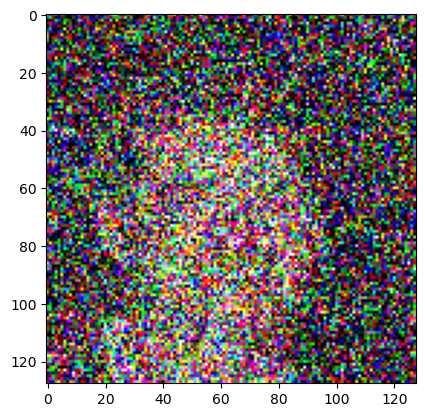

In [9]:
plt.imshow(result[10,1,:,:,:].cpu().permute(1,2,0))